Run 1/10: Accuracy = 0.99
Run 2/10: Accuracy = 0.99
Run 3/10: Accuracy = 0.98
Run 4/10: Accuracy = 0.98
Run 5/10: Accuracy = 0.98
Run 6/10: Accuracy = 0.98
Run 7/10: Accuracy = 0.99
Run 8/10: Accuracy = 0.99
Run 9/10: Accuracy = 0.99
Run 10/10: Accuracy = 0.98


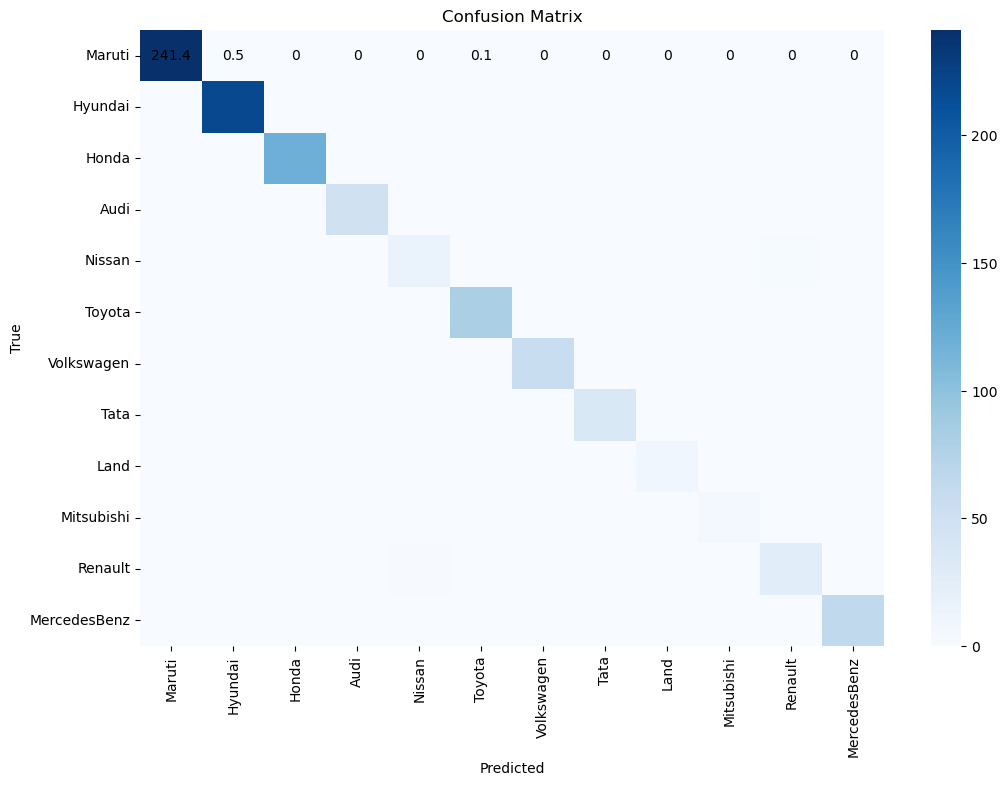

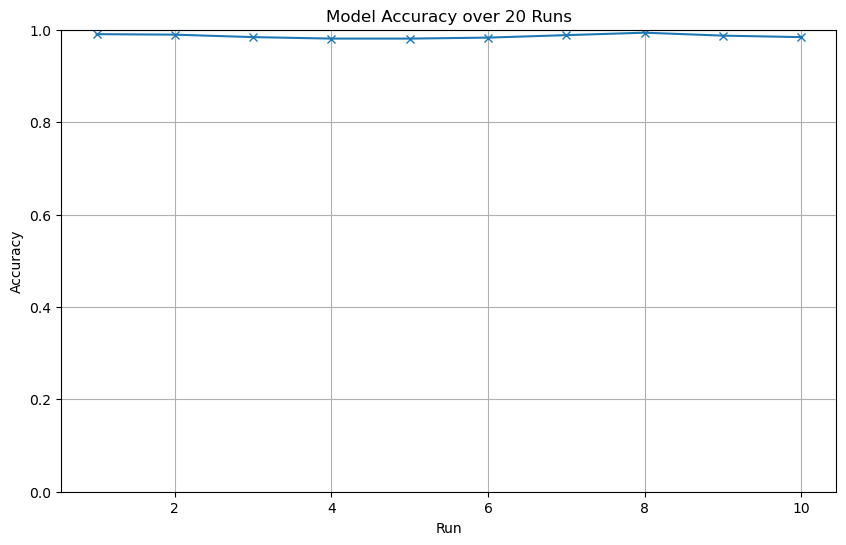

Average Accuracy over 20 runs: 0.99


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('new_car_data.csv')

# Columns to drop
columns_to_drop = [
    # Add columns you want to drop from the new data
]

# Drop specified columns
data = data.drop(columns_to_drop, axis=1)
data = data.dropna()

# List of features
features = [
    "Engine CC",
    "Power",
    "Seats",
    "Mileage Km/L",
    # Add more features as needed
]

# Define X (features) and y (target)
X = data[features]
y = data["Manufacturer"]

# Get all unique class labels and filter to the first 12
class_labels = y.unique()[:12]

# Filter data to include only the first 12 manufacturers
data_filtered = data[data['Manufacturer'].isin(class_labels)]
X_filtered = data_filtered[features]
y_filtered = data_filtered["Manufacturer"]

# Initialize lists to store accuracy scores and confusion matrices
accuracies = []
conf_matrices = []

# Run the model 20 times
for i in range(10):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Generate confusion matrix with consistent labels
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/10: Accuracy = {accuracy:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
ax = sns.heatmap(avg_conf_matrix, annot=True, fmt='g', cmap='Blues', 
                 xticklabels=class_labels, yticklabels=class_labels, 
                 annot_kws={"size": 10, "color": "black"})
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# Plot the accuracy over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='x')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print final average accuracy
avg_accuracy = np.mean(accuracies)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')


Run 1/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 2/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 3/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 4/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 5/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 6/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 7/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 8/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 9/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 10/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 11/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 12/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 13/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 14/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 15/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 16/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 17/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 18

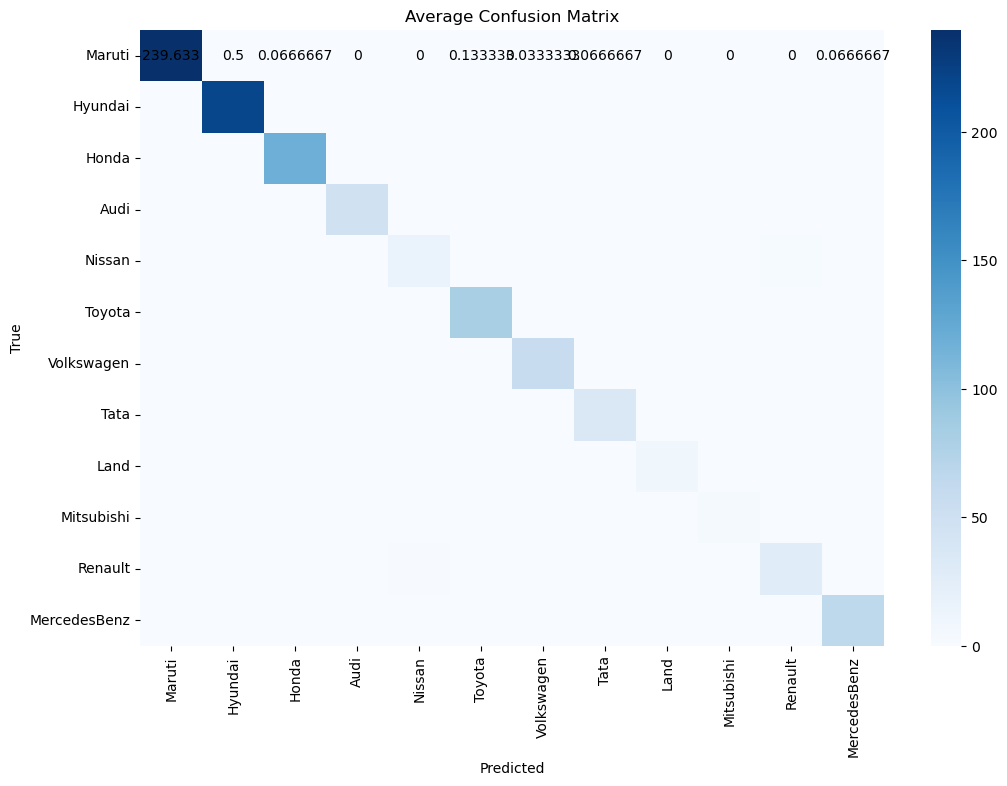


Classification Report for the last run:
              precision    recall  f1-score   support

      Maruti       0.98      0.98      0.98        50
     Hyundai       0.96      1.00      0.98       121
       Honda       1.00      1.00      1.00       215
        Audi       1.00      1.00      1.00        10
      Nissan       0.99      1.00      0.99       241
      Toyota       1.00      1.00      1.00        65
  Volkswagen       1.00      1.00      1.00         4
        Tata       1.00      0.78      0.88        18
        Land       0.92      1.00      0.96        33
  Mitsubishi       1.00      0.87      0.93        38
     Renault       1.00      0.99      0.99        87
MercedesBenz       0.98      0.98      0.98        55

    accuracy                           0.99       937
   macro avg       0.99      0.97      0.97       937
weighted avg       0.99      0.99      0.99       937



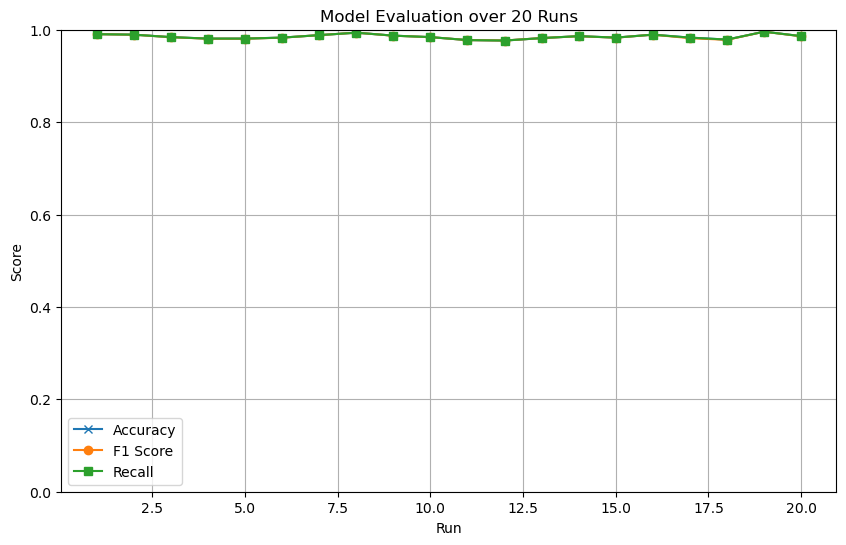

Average Accuracy over 20 runs: 0.98
Average F1 Score over 20 runs: 0.98
Average Recall over 20 runs: 0.98

Detailed Confusion Matrix Table:
Class Maruti:
  True Positive (TP): 239.63333333333333
  False Positive (FP): 1.0333333333333314
  False Negative (FN): 0.8666666666666458
  True Negative (TN): 695.4666666666667

Class Hyundai:
  True Positive (TP): 219.76666666666668
  False Positive (FP): 1.9333333333333655
  False Negative (FN): 1.8999999999999773
  True Negative (TN): 713.4

Class Honda:
  True Positive (TP): 117.96666666666667
  False Positive (FP): 2.3333333333333286
  False Negative (FN): 0.36666666666666003
  True Negative (TN): 816.3333333333334

Class Audi:
  True Positive (TP): 47.96666666666667
  False Positive (FP): 0.93333333333333
  False Negative (FN): 1.1999999999999957
  True Negative (TN): 886.9

Class Nissan:
  True Positive (TP): 15.333333333333334
  False Positive (FP): 1.7333333333333325
  False Negative (FN): 2.3000000000000025
  True Negative (TN): 917.633

In [5]:
from sklearn.metrics import f1_score, recall_score, classification_report

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
recalls = []

# Run the model 20 times
for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate F1 score and recall
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)
    recalls.append(recall)

    # Generate confusion matrix with consistent labels
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/20: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}, Recall = {recall:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
ax = sns.heatmap(avg_conf_matrix, annot=True, fmt='g', cmap='Blues', 
                 xticklabels=class_labels, yticklabels=class_labels, 
                 annot_kws={"size": 10, "color": "black"})
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Average Confusion Matrix')
plt.show()

# Print classification report for the last run
print("\nClassification Report for the last run:")
print(classification_report(y_test, y_pred, target_names=class_labels))

# Plot the accuracy, F1 score, and recall over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='x', label='Accuracy')
plt.plot(range(1, 21), f1_scores, marker='o', label='F1 Score')
plt.plot(range(1, 21), recalls, marker='s', label='Recall')
plt.xlabel('Run')
plt.ylabel('Score')
plt.title('Model Evaluation over 20 Runs')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Print final average metrics
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f1_scores)
avg_recall = np.mean(recalls)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')
print(f'Average F1 Score over 20 runs: {avg_f1_score:.2f}')
print(f'Average Recall over 20 runs: {avg_recall:.2f}')

# Print detailed confusion matrix table
print("\nDetailed Confusion Matrix Table:")
for i, label in enumerate(class_labels):
    TP = avg_conf_matrix[i, i]
    FP = avg_conf_matrix[:, i].sum() - TP
    FN = avg_conf_matrix[i, :].sum() - TP
    TN = avg_conf_matrix.sum() - (TP + FP + FN)
    print(f"Class {label}:")
    print(f"  True Positive (TP): {TP}")
    print(f"  False Positive (FP): {FP}")
    print(f"  False Negative (FN): {FN}")
    print(f"  True Negative (TN): {TN}")
    print()


Run 1/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 2/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 3/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 4/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 5/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 6/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 7/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 8/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 9/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 10/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 11/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 12/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 13/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 14/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 15/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 16/20: Accuracy = 0.99, F1 Score = 0.99, Recall = 0.99
Run 17/20: Accuracy = 0.98, F1 Score = 0.98, Recall = 0.98
Run 18

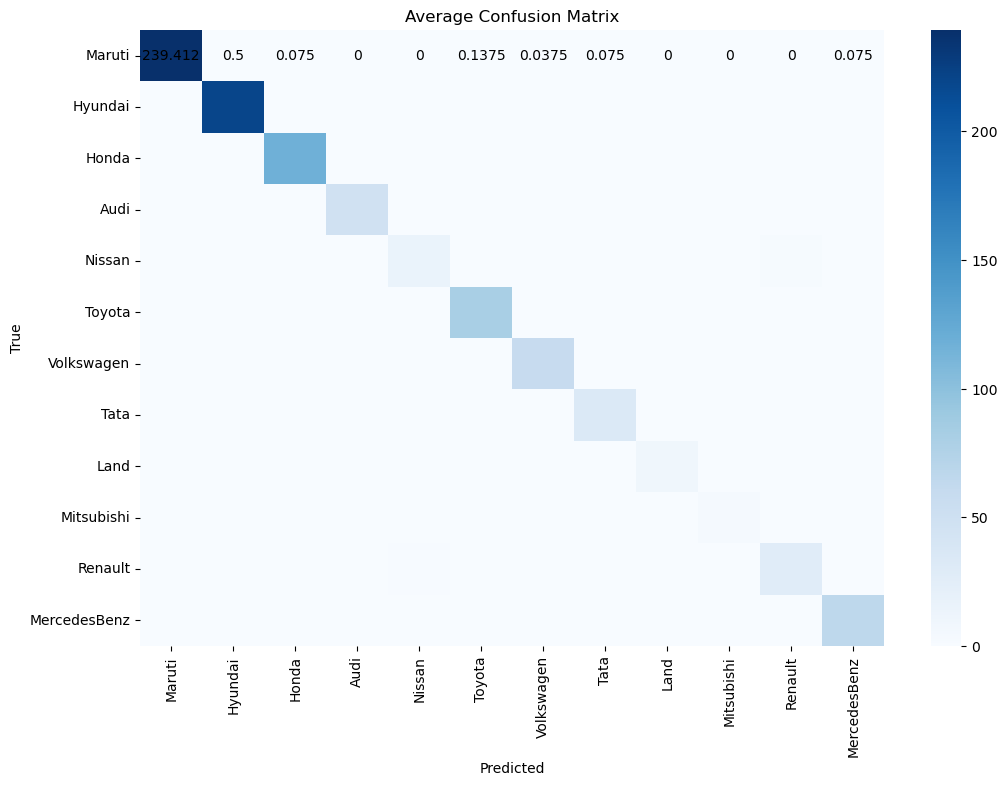


Classification Report for the last run:
              precision    recall  f1-score   support

      Maruti       0.98      0.98      0.98        50
     Hyundai       0.96      1.00      0.98       121
       Honda       1.00      1.00      1.00       215
        Audi       1.00      1.00      1.00        10
      Nissan       0.99      1.00      0.99       241
      Toyota       1.00      1.00      1.00        65
  Volkswagen       1.00      1.00      1.00         4
        Tata       1.00      0.78      0.88        18
        Land       0.92      1.00      0.96        33
  Mitsubishi       1.00      0.87      0.93        38
     Renault       1.00      0.99      0.99        87
MercedesBenz       0.98      0.98      0.98        55

    accuracy                           0.99       937
   macro avg       0.99      0.97      0.97       937
weighted avg       0.99      0.99      0.99       937



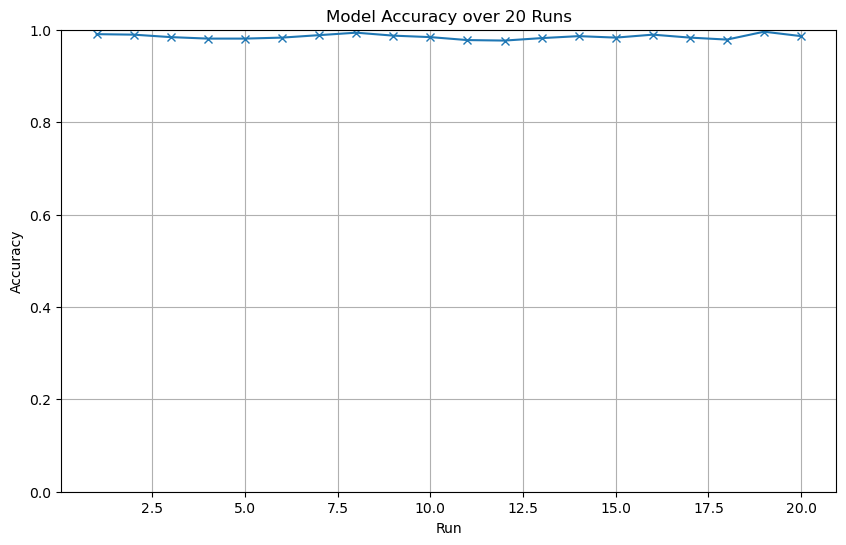

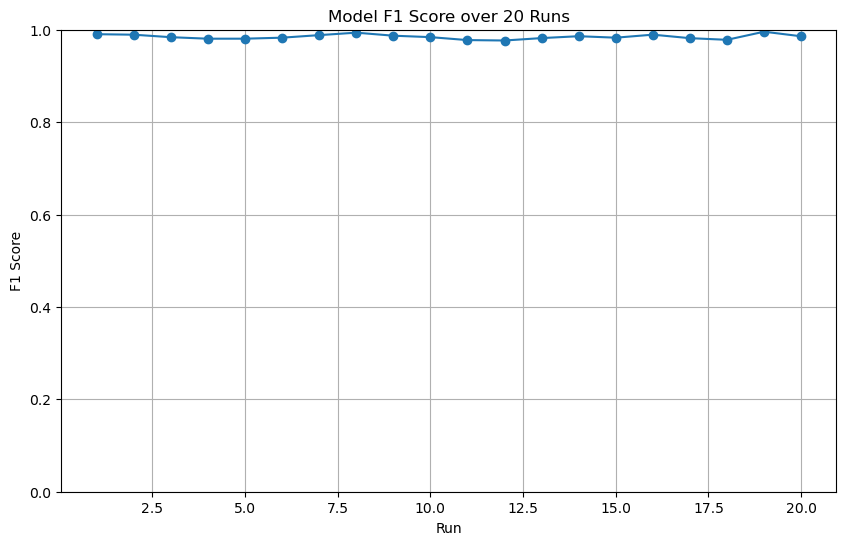

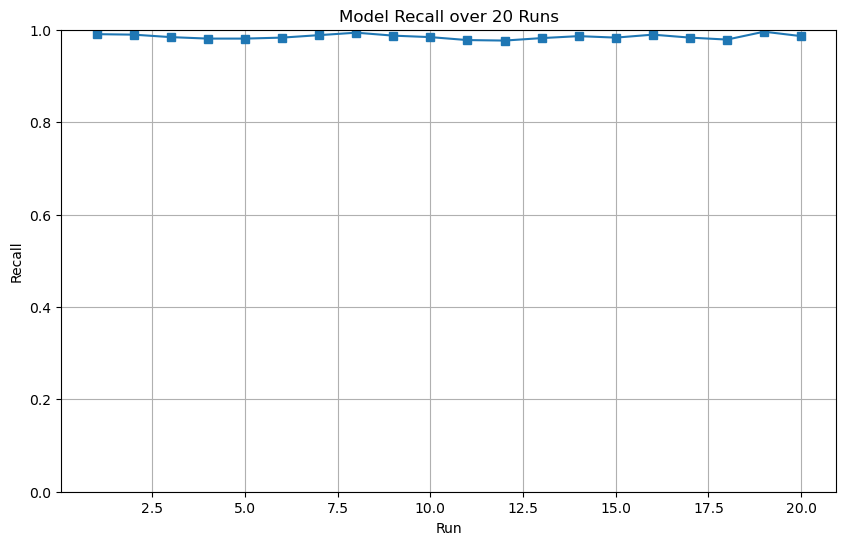

Average Accuracy over 20 runs: 0.98
Average F1 Score over 20 runs: 0.98
Average Recall over 20 runs: 0.98

Detailed Confusion Matrix Table:
Class Maruti:
  True Positive (TP): 239.4125
  False Positive (FP): 1.0250000000000057
  False Negative (FN): 0.8999999999999773
  True Negative (TN): 695.6625

Class Hyundai:
  True Positive (TP): 219.8125
  False Positive (FP): 1.924999999999983
  False Negative (FN): 1.9000000000000057
  True Negative (TN): 713.3625

Class Honda:
  True Positive (TP): 117.8
  False Positive (FP): 2.375
  False Negative (FN): 0.36249999999999716
  True Negative (TN): 816.4625

Class Audi:
  True Positive (TP): 47.925
  False Positive (FP): 0.9500000000000028
  False Negative (FN): 1.20000000000001
  True Negative (TN): 886.925

Class Nissan:
  True Positive (TP): 15.25
  False Positive (FP): 1.7375000000000007
  False Negative (FN): 2.337500000000002
  True Negative (TN): 917.675

Class Toyota:
  True Positive (TP): 82.0375
  False Positive (FP): 0.6875
  False N

In [6]:
from sklearn.metrics import f1_score, recall_score, classification_report

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
recalls = []

# Run the model 20 times
for i in range(20):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate F1 score and recall
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)
    recalls.append(recall)

    # Generate confusion matrix with consistent labels
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/20: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}, Recall = {recall:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
ax = sns.heatmap(avg_conf_matrix, annot=True, fmt='g', cmap='Blues', 
                 xticklabels=class_labels, yticklabels=class_labels, 
                 annot_kws={"size": 10, "color": "black"})
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Average Confusion Matrix')
plt.show()

# Print classification report for the last run
print("\nClassification Report for the last run:")
print(classification_report(y_test, y_pred, target_names=class_labels))

# Plot accuracy over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='x', label='Accuracy')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plot F1 score over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), f1_scores, marker='o', label='F1 Score')
plt.xlabel('Run')
plt.ylabel('F1 Score')
plt.title('Model F1 Score over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plot recall over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), recalls, marker='s', label='Recall')
plt.xlabel('Run')
plt.ylabel('Recall')
plt.title('Model Recall over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print final average metrics
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f1_scores)
avg_recall = np.mean(recalls)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')
print(f'Average F1 Score over 20 runs: {avg_f1_score:.2f}')
print(f'Average Recall over 20 runs: {avg_recall:.2f}')

# Print detailed confusion matrix table
print("\nDetailed Confusion Matrix Table:")
for i, label in enumerate(class_labels):
    TP = avg_conf_matrix[i, i]
    FP = avg_conf_matrix[:, i].sum() - TP
    FN = avg_conf_matrix[i, :].sum() - TP
    TN = avg_conf_matrix.sum() - (TP + FP + FN)
    print(f"Class {label}:")
    print(f"  True Positive (TP): {TP}")
    print(f"  False Positive (FP): {FP}")
    print(f"  False Negative (FN): {FN}")
    print(f"  True Negative (TN): {TN}")
    print()
